In [1]:
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [2]:
plt.rcParams["font.family"] = 'arial'
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
%matplotlib inline
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})

plt.style.use("seaborn-colorblind")
#jtplot.style()
mpl.rcParams['patch.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = 1 # set the value globally

In [55]:
myfile= v.ExcelFile('WaterSensitivity_500ppm.xlsx',   input_type='wtpercent')
data = myfile.data
data.head()

,SampleName,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,Press,Temp
Label,,,,,,,,,,,,,,,,,,,
test2,test,50.793,2.55,13.523,1.889498,0,9.63645,0.179,7.432,0,0,10.594,2.303,0.429,0.378,0.00,0.05,1055.0,1200
7,not,50.793,2.55,13.523,1.889498,0,9.63645,0.179,7.432,0,0,10.594,2.303,0.429,0.378,0.01,0.05,1055.0,1200
7,not,50.793,2.55,13.523,1.889498,0,9.63645,0.179,7.432,0,0,10.594,2.303,0.429,0.378,0.02,0.05,1055.0,1200
7,not,50.793,2.55,13.523,1.889498,0,9.63645,0.179,7.432,0,0,10.594,2.303,0.429,0.378,0.03,0.05,1054.5,1200
7,not,50.793,2.55,13.523,1.889498,0,9.63645,0.179,7.432,0,0,10.594,2.303,0.429,0.378,0.04,0.05,1054.5,1200


In [4]:
satPs_wtemps_Magmasat=myfile.calculate_saturation_pressure(temperature="Temp")

Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 7
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating sample 8
Calculating s

In [43]:
satPs_wtemps_Shishkina=myfile.calculate_saturation_pressure(temperature="Temp", model="Shishkina")
satPs_wtemps_ShishkinaCarbon=myfile.calculate_saturation_pressure(temperature="Temp", model="ShishkinaCarbon")

In [44]:
satPs_wtemps_IaconoMarziano=myfile.calculate_saturation_pressure(temperature="Temp", model="IaconoMarziano")

In [45]:
satPs_wtemps_Dixon=myfile.calculate_saturation_pressure(temperature="Temp", model="Dixon")

/home/jovyan/ThermoEngine/Notebooks/Development/F8_Work/VESIcal.py:3788: RuntimeWarning: Saturation pressure not found.
  warnings.warn("Saturation pressure not found.",RuntimeWarning)


In [46]:
myfile.save_excelfile(filename='MagmasatTesting.xlsx', calculations=[satPs_wtemps_Magmasat, satPs_wtemps_Shishkina, satPs_wtemps_IaconoMarziano, satPs_wtemps_Dixon], sheet_name=['magmasat', 'Shishkina', 'Iacono', 'Dixon'])

Saved MagmasatTesting.xlsx


In [47]:
#Testingmakingownmodel usin Liu
mixed_model_Shishkina_Liu = v.MixedFluid({'CO2':v.ShishkinaCarbon(),
                            'H2O':v.LiuWater()})
satPs_wtemps_ShishkinaLiuMixed=myfile.calculate_saturation_pressure(temperature="Temp", model=mixed_model_Shishkina_Liu)


/home/jovyan/ThermoEngine/Notebooks/Development/F8_Work/VESIcal.py:4962: RuntimeWarning: invalid value encountered in double_scalars
  0.0012439*Pw**(1.5) + PCO2*(-1.084*10**(-4)*Pw**(0.5) - 1.362*10**(-5)*Pw))


In [48]:
#Testingmakingownmodel usin Liu
mixed_model_Shishkina_Moore = v.MixedFluid({'CO2':v.ShishkinaCarbon(),
                            'H2O':v.MooreWater()})
satPs_wtemps_ShishkinaMooreMixed=myfile.calculate_saturation_pressure(temperature="Temp", model=mixed_model_Shishkina_Moore)


/home/jovyan/ThermoEngine/Notebooks/Development/F8_Work/VESIcal.py:4777: RuntimeWarning: divide by zero encountered in log
  two_ln_XH2Omelt = (aParam / temperatureK) + b_x_sum * (pressure/temperatureK) + cParam * np.log(fH2O) + dParam
/home/jovyan/ThermoEngine/Notebooks/Development/F8_Work/VESIcal.py:4777: RuntimeWarning: invalid value encountered in log
  two_ln_XH2Omelt = (aParam / temperatureK) + b_x_sum * (pressure/temperatureK) + cParam * np.log(fH2O) + dParam


In [49]:
#Testingmakingownmodel usin Liu
mixed_model_Shishkina_IaconoMarziano = v.MixedFluid({'CO2':v.ShishkinaCarbon(),
                            'H2O':v.IaconoMarzianoWater()})
satPs_wtemps_ShishkinaIaconoMarzianoMixed=myfile.calculate_saturation_pressure(temperature="Temp", model=mixed_model_Shishkina_IaconoMarziano)


ValueError: not enough values to unpack (expected 2, got 1)

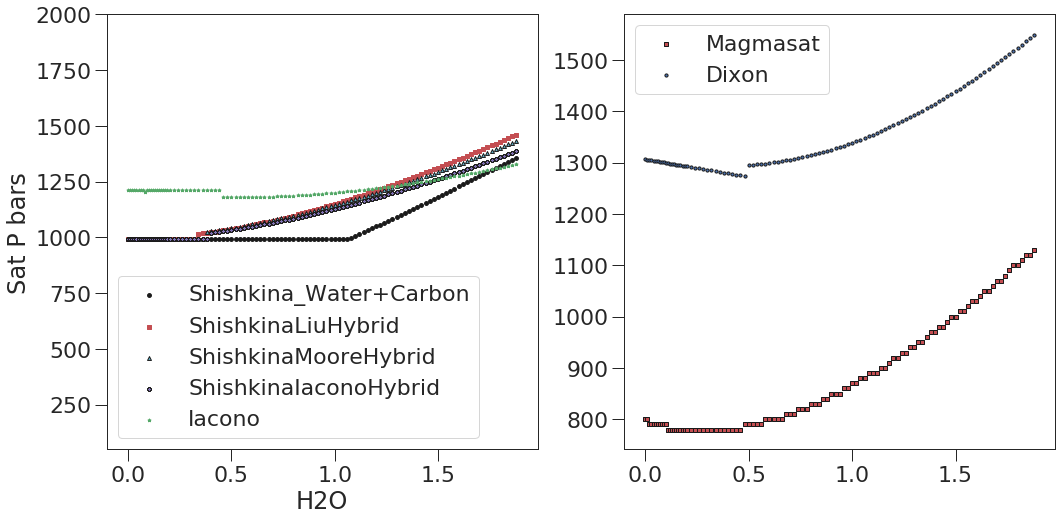

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,8))

ax1.scatter(satPs_wtemps_Shishkina['H2O'], satPs_wtemps_Shishkina['SaturationP_bars_VESIcal'], marker='o',  s=15,  facecolor='k', label='Shishkina_Water+Carbon')
ax1.scatter(satPs_wtemps_ShishkinaLiuMixed['H2O'], satPs_wtemps_ShishkinaLiuMixed['SaturationP_bars_VESIcal'], marker='s',  s=15,  facecolor='r', label='ShishkinaLiuHybrid')
ax1.scatter(satPs_wtemps_ShishkinaMooreMixed['H2O'], satPs_wtemps_ShishkinaMooreMixed['SaturationP_bars_VESIcal'], marker='^',  s=15,  facecolor='c', edgecolor='k', label='ShishkinaMooreHybrid')
ax1.scatter(satPs_wtemps_ShishkinaIaconoMarzianoMixed['H2O'], satPs_wtemps_ShishkinaIaconoMarzianoMixed['SaturationP_bars_VESIcal'], marker='P',edgecolor='k',  s=10,  facecolor='m', label='ShishkinaIaconoHybrid')
ax1.set_xlabel('H2O')
ax1.set_ylabel('Sat P bars')
ax1.scatter(satPs_wtemps_IaconoMarziano['H2O'], satPs_wtemps_IaconoMarziano['SaturationP_bars_VESIcal'], marker='*', facecolor='g', s=10,  edgecolor='g', label='Iacono')
ax1.legend()
ax1.set_ylim([50, 2000])
ax2.scatter(satPs_wtemps_Magmasat['H2O'], satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'], marker='s',  s=10,  facecolor='r',edgecolor='k', label='Magmasat')
ax2.scatter(satPs_wtemps_Dixon['H2O'], satPs_wtemps_Dixon['SaturationP_bars_VESIcal'], marker='o', facecolor='b', s=10,  edgecolor='k', label='Dixon')
ax2.legend()
ax2.set_ylim([50, ])
ax2.set_xlabel('H2O')
ax2.set_ylabel('Sat P bars')

In [ ]:
fig, ax1 = plt.subplots(figsize = (17,8)) # adjust dimensions of figure here
 # adjust y limits here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
plt.xlabel('H$_2$O', fontdict=font, labelpad = 20)
plt.ylabel('Sat P', fontdict=font, labelpad = 20)
plt.title('500 ppm')

ax1.scatter(satPs_wtemps_Shishkina['H2O'], satPs_wtemps_Shishkina['SaturationP_bars_VESIcal'], marker='o',  s=20,  facecolor='k', label='Shishkina')
#ax1.scatter(satPs_wtemps_ShishkinaCarbon['H2O'], satPs_wtemps_ShishkinaCarbon['SaturationP_bars_VESIcal'], marker='^',  s=15,  facecolor='k', label='ShishkinaCarbon')
ax1.scatter(satPs_wtemps_IaconoMarziano['H2O'], satPs_wtemps_IaconoMarziano['SaturationP_bars_VESIcal'], marker='o', facecolor='g', s=20,  edgecolor='g', label='Iacono')
ax1.legend()
#ax1.set_ylim([50, 2000])
ax1.scatter(satPs_wtemps_Magmasat['H2O'], satPs_wtemps_Magmasat['SaturationP_bars_VESIcal'], marker='s',  s=20,  facecolor='red',edgecolor='k', label='Magmasat')
ax1.scatter(satPs_wtemps_Dixon['H2O'], satPs_wtemps_Dixon['SaturationP_bars_VESIcal'], marker='d', facecolor='b', s=20,  edgecolor='b', label='Dixon')
ax1.scatter(data['H2O'], data['Press'], marker='p', facecolor='b', s=20,  edgecolor='b', label='Dixon macro')

ax1.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
fig.tight_layout()

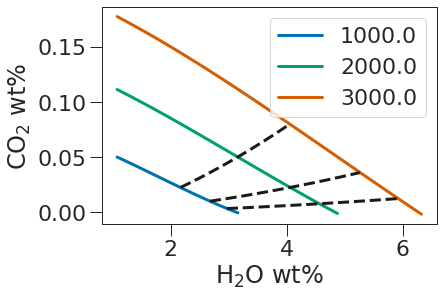

In [65]:
# Calculating isobars
"""To get composition from a specific sample in the input data:"""
SampleName = 'test2'
bulk_comp = myfile.get_sample_oxide_comp(SampleName, norm='standard')

"""Define all variables to be passed to the function for calculating isobars and isopleths"""
"""Define the temperature in degrees C"""
temperature = 1200.0

"""Define a list of pressures in bars:"""
pressures = [1000.0, 2000, 3000]

isobars, isopleths = v.calculate_isobars_and_isopleths(sample=bulk_comp, model='Shishkina',
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0.25, 0.5, 0.1],
                                            print_status=True).result
v.plot_isobars_and_isopleths(isobars, isopleths)

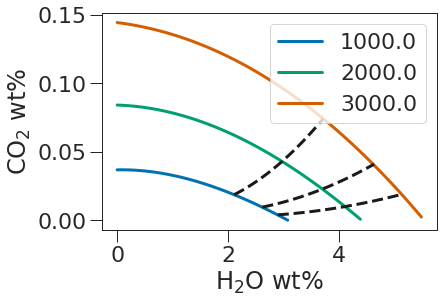

In [66]:
isobars, isopleths = v.calculate_isobars_and_isopleths(sample=bulk_comp, model='Dixon',
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0.25, 0.5, 0.1],
                                            print_status=True).result
v.plot_isobars_and_isopleths(isobars, isopleths)